In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/sample_submission.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/test.csv


In [2]:
dataset_path = '/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/'
df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
dftest = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
print("The shape of the dataset is {}.\n\n".format(df.shape))
print("The shape of the dataset is {}.\n\n".format(dftest.shape))
df.head()

The shape of the dataset is (10834, 18).


The shape of the dataset is (2709, 17).




,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [3]:
# df = pd.read_csv('train.csv')
# df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [5]:
df.describe()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,5416.500000,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,3127.650742,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,0.000000,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,2708.250000,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,5416.500000,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,8124.750000,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,10833.000000,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [6]:
df['y'].unique()

array(['HOROZ', 'SEKER', 'DERMASON', 'SIRA', 'BARBUNYA', 'CALI', 'BOMBAY'],
      dtype=object)

In [7]:
yData=df['y']

In [8]:
df = pd.get_dummies(df, columns=['y'])
df

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,...,ShapeFactor2,ShapeFactor3,ShapeFactor4,y_BARBUNYA,y_BOMBAY,y_CALI,y_DERMASON,y_HOROZ,y_SEKER,y_SIRA
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,...,0.000929,0.469994,0.998595,0,0,0,0,1,0,0
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,...,0.002376,0.803510,0.997370,0,0,0,0,0,1,0
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,...,0.002293,0.700453,0.997737,0,0,0,1,0,0,0
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,...,0.002005,0.685142,0.999250,0,0,0,1,0,0,0
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,...,0.001912,0.684755,0.996507,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,10829,37777,716.007,250.174662,192.704033,1.298233,0.637708,38174,219.315230,0.770519,...,0.002413,0.768513,0.997708,0,0,0,0,0,1,0
10830,10830,32187,667.621,247.778775,165.786862,1.494562,0.743179,32582,202.439525,0.731805,...,0.002116,0.667517,0.997646,0,0,0,1,0,0,0
10831,10831,81837,1095.937,433.838186,241.527026,1.796230,0.830699,82554,322.797312,0.771996,...,0.001002,0.553610,0.994412,0,0,1,0,0,0,0
10832,10832,48212,826.362,309.639462,199.285811,1.553746,0.765357,48777,247.760822,0.677002,...,0.001624,0.640255,0.994793,0,0,0,0,0,0,1


In [9]:
df.columns

Index(['ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y_BARBUNYA', 'y_BOMBAY', 'y_CALI',
       'y_DERMASON', 'y_HOROZ', 'y_SEKER', 'y_SIRA'],
      dtype='object')

In [10]:
x = df[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']]
y = df[['y_BARBUNYA', 'y_BOMBAY', 'y_CALI',
       'y_DERMASON', 'y_HOROZ', 'y_SEKER', 'y_SIRA']]

In [11]:
y 

,y_BARBUNYA,y_BOMBAY,y_CALI,y_DERMASON,y_HOROZ,y_SEKER,y_SIRA
0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
10829,0,0,0,0,0,1,0
10830,0,0,0,1,0,0,0
10831,0,0,1,0,0,0,0
10832,0,0,0,0,0,0,1


In [12]:
x

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,37777,716.007,250.174662,192.704033,1.298233,0.637708,38174,219.315230,0.770519,0.989600,0.925983,0.876648,0.006622,0.002413,0.768513,0.997708
10830,32187,667.621,247.778775,165.786862,1.494562,0.743179,32582,202.439525,0.731805,0.987877,0.907466,0.817017,0.007698,0.002116,0.667517,0.997646
10831,81837,1095.937,433.838186,241.527026,1.796230,0.830699,82554,322.797312,0.771996,0.991315,0.856226,0.744050,0.005301,0.001002,0.553610,0.994412
10832,48212,826.362,309.639462,199.285811,1.553746,0.765357,48777,247.760822,0.677002,0.988417,0.887206,0.800159,0.006422,0.001624,0.640255,0.994793


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state=42,stratify =yData)

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_val= sc.transform(x_val)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

2021-09-30 13:39:50.952220: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-30 13:39:50.952344: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [17]:
x.shape

(10834, 16)

In [18]:
x.shape[1]

16

In [19]:
y.shape

(10834, 7)

In [20]:
y.shape[1]

7

## Defining the model structure

In [21]:
model = Sequential()
model.add(Dense(256, input_shape=[x.shape[1]], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

2021-09-30 13:39:57.507485: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-30 13:39:57.510871: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-30 13:39:57.510911: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-30 13:39:57.510943: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (d27c6da0a7b8): /proc/driver/nvidia/version does not exist
2021-09-30 13:39:57.512470: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               4352      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 3591      
Total params: 139,527
Trainable params: 139,527
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 10,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=100)

## Training the model

In [25]:
history = model.fit(x=x_train, y=y_train, epochs=500, callbacks=[lrd, mcp, es], batch_size=32, validation_split=0.1)

2021-09-30 13:39:58.386518: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-30 13:39:58.401695: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/500
244/244 [==============================] - 2s 6ms/step - loss: 0.5988 - accuracy: 0.7986 - val_loss: 0.1861 - val_accuracy: 0.9285
Epoch 2/500
244/244 [==============================] - 1s 3ms/step - loss: 0.2352 - accuracy: 0.9164 - val_loss: 0.2088 - val_accuracy: 0.9227
Epoch 3/500
244/244 [==============================] - 1s 3ms/step - loss: 0.2197 - accuracy: 0.9215 - val_loss: 0.2027 - val_accuracy: 0.9296
Epoch 4/500
244/244 [==============================] - 1s 3ms/step - loss: 0.2073 - accuracy: 0.9260 - val_loss: 0.1701 - val_accuracy: 0.9400
Epoch 5/500
244/244 [==============================] - 1s 3ms/step - loss: 0.2161 - accuracy: 0.9205 - val_loss: 0.1850 - val_accuracy: 0.9377
Epoch 6/500
244/244 [==============================] - 1s 3ms/step - loss: 0.2058 - accuracy: 0.9228 - val_loss: 0.1669 - val_accuracy: 0.9400
Epoch 7/500
244/244 [==============================] - 1s 3ms/step - loss: 0.2030 - accuracy: 0.9219 - val_loss: 0.1789 - val_accuracy: 0.9377

## Testing & evaluating the model

In [26]:
y_pred = np.argmax(model.predict(x_val), axis=-1)
y_pred 

array([3, 3, 3, ..., 4, 6, 3])

In [27]:
y_val

,y_BARBUNYA,y_BOMBAY,y_CALI,y_DERMASON,y_HOROZ,y_SEKER,y_SIRA
1814,0,0,0,1,0,0,0
6155,0,0,0,1,0,0,0
7181,0,0,0,1,0,0,0
7830,0,0,0,1,0,0,0
1276,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
6114,0,0,0,1,0,0,0
9902,0,0,0,0,0,0,1
8669,0,0,0,0,1,0,0
8899,0,0,0,0,0,0,1


In [28]:
np.argmax(model.predict(x_val), axis=-1)[10]

3

In [29]:
y_val.iloc[10]

y_BARBUNYA    0
y_BOMBAY      0
y_CALI        0
y_DERMASON    1
y_HOROZ       0
y_SEKER       0
y_SIRA        0
Name: 7177, dtype: uint8

In [30]:
model.evaluate(x_val, y_val)

68/68 [==============================] - 0s 1ms/step - loss: 0.2441 - accuracy: 0.9317


[0.24413929879665375, 0.9317027926445007]

In [31]:
y_pred

array([3, 3, 3, ..., 4, 6, 3])

## Visualize Loss

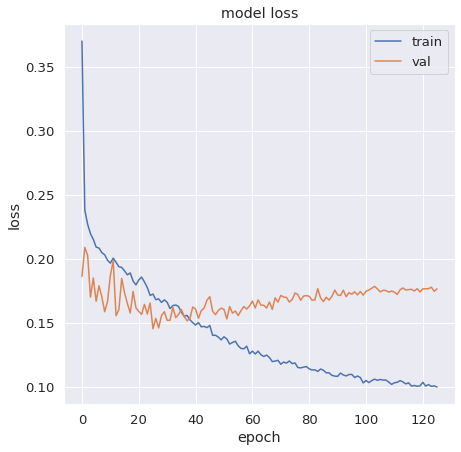

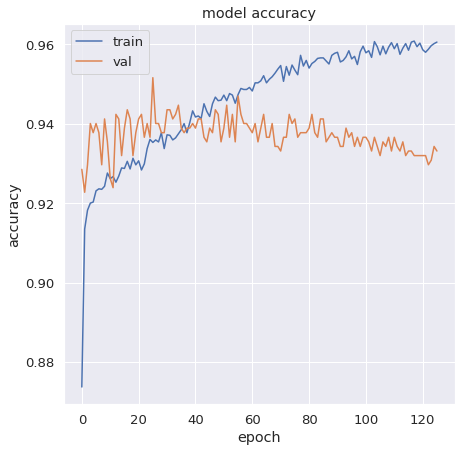

In [32]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

_________________________________________________________

# Test Data

In [33]:
ID=dftest["ID"]

In [34]:
xtest=dftest.drop(columns=['ID'])
xtest

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,66833,1018.336,400.397077,214.346215,1.867992,0.844640,67787,291.709476,0.759604,0.985927,0.809876,0.728550,0.005991,0.001041,0.530786,0.991504
2705,40572,725.331,250.714014,206.471935,1.214276,0.567264,40900,227.283688,0.767479,0.991980,0.969089,0.906546,0.006179,0.002574,0.821825,0.997923
2706,61226,1008.378,408.227467,199.385082,2.047432,0.872611,63901,279.204879,0.611648,0.958138,0.756657,0.683944,0.006668,0.000900,0.467780,0.957748
2707,34238,698.847,255.829224,170.867099,1.497241,0.744255,34724,208.789788,0.724890,0.986004,0.880956,0.816130,0.007472,0.002045,0.666067,0.997263


In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(xtest)
xtest = sc.transform(xtest)

In [36]:
y_pred2 = np.argmax(model.predict(xtest), axis=-1)
y_pred2

array([4, 3, 0, ..., 4, 3, 6])

In [37]:
dfyPred = pd.DataFrame(y_pred2, columns = ["yPred"])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==0), 'y_BARBUNYA',dfyPred['yPred'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==1), 'y_BOMBAY',dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==2), 'y_CALI',dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==3), 'y_DERMASON',dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==4), 'y_HOROZ',dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==5), 'y_SEKER',dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==6), 'y_SIRA',dfyPred['yPredNew'])
dfyPred['result'] = dfyPred['yPredNew'].map(lambda x: x.lstrip('y_'))
dfyPred=dfyPred["result"]
dfyPred

0          HOROZ
1       DERMASON
2       BARBUNYA
3       DERMASON
4         BOMBAY
          ...   
2704        CALI
2705       SEKER
2706       HOROZ
2707    DERMASON
2708        SIRA
Name: result, Length: 2709, dtype: object

In [38]:
dftest['y'] = dfyPred

In [39]:
dftest

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889,HOROZ
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956,DERMASON
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607,BARBUNYA
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596,DERMASON
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803,BOMBAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,13538,66833,1018.336,400.397077,214.346215,1.867992,0.844640,67787,291.709476,0.759604,0.985927,0.809876,0.728550,0.005991,0.001041,0.530786,0.991504,CALI
2705,13539,40572,725.331,250.714014,206.471935,1.214276,0.567264,40900,227.283688,0.767479,0.991980,0.969089,0.906546,0.006179,0.002574,0.821825,0.997923,SEKER
2706,13540,61226,1008.378,408.227467,199.385082,2.047432,0.872611,63901,279.204879,0.611648,0.958138,0.756657,0.683944,0.006668,0.000900,0.467780,0.957748,HOROZ
2707,13541,34238,698.847,255.829224,170.867099,1.497241,0.744255,34724,208.789788,0.724890,0.986004,0.880956,0.816130,0.007472,0.002045,0.666067,0.997263,DERMASON


In [40]:
dftest.drop(columns="ID",inplace=True)
dfTest=pd.concat([dftest, ID],axis=1)

dfTest[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)
# dfTest[['ID', 'y']].to_csv('submission.csv', index=False)

__________________________